In [7]:
from dataloader_path import HypersimDataset
import numpy as np
import matplotlib.pyplot as plt
csv = "data/train_data.csv"
loader = HypersimDataset(csv_file=csv, data_path = "./data/")
img = loader.__getitem__(102)


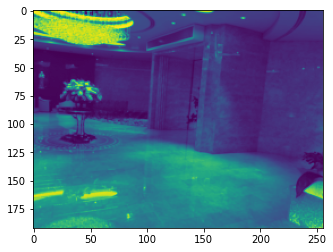

In [9]:
img = loader.__getitem__(53)
img = img

togray = img.permute(1,2,0).numpy()
gray = np.dot(togray, [0.299, 0.587, 0.114])
todark = ((-.1 < gray) & (gray < .1)).sum()
total = gray.shape[0] * gray.shape[1]
todark /total
plt.imshow(gray)


In [13]:
bad_idx = []
found = 0
cut_size = 1e5
for idx in range(len(loader)): 
    img = loader.__getitem__(idx)
    img = img
    togray = img.permute(1,2,0).numpy()
    gray = np.dot(togray, [0.299, 0.587, 0.114])
    todark = ((-.1 < gray) & (gray < .1)).sum()
    tobright = ((.9 < gray) & (gray < 1)).sum()
    total = gray.shape[0] * gray.shape[1]
    perdark = todark / total
    perbright = tobright /total
    if perdark > .95 or perbright > .95: 
        found += 1
        bad_idx += [idx]
        print(idx)
        # plt.imshow( img.permute(1,2,0).numpy())
        # plt.show()


In [14]:
len(bad_idx)

0

In [ ]:
df = pd.read_csv(csv, usecols = [1,2,3])
df.drop(bad_idx, inplace=True)
df.reset_index(inplace=True)
df.to_csv(csv)

In [ ]:
df = pd.read_csv(csv, usecols = [1,2,3])
df

11436